In [125]:
import bs4 #beautifulsoup 4
from urllib.request import urlopen as uReq #url open module
from bs4 import BeautifulSoup as soup #beautifulsoup module
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import re

In [126]:
#Hämta en sida
url = "https://en.wikipedia.org/wiki/Transistor_count"
uClient = uReq(url)
page_html = uClient.read()
uClient.close()

In [127]:
#Visa innehållet av datan
page_soup = soup(page_html, "html.parser")
containers = page_soup.find("table",{"class":"wikitable sortable"})
containers

<table class="wikitable sortable" style="text-align:center">
<tbody><tr>
<th>Processor
</th>
<th data-sort-type="number">Transistor count
</th>
<th>Date of introduction
</th>
<th>Designer
</th>
<th data-sort-type="number"><a href="/wiki/Semiconductor_device_fabrication" title="Semiconductor device fabrication">Process</a>
</th>
<th data-sort-type="number">Area
</th></tr>
<tr>
<td><a class="new" href="/w/index.php?title=Tegra_Xavier_SoC&amp;action=edit&amp;redlink=1" title="Tegra Xavier SoC (page does not exist)">Tegra Xavier SoC</a>
</td>
<td>9,000,000,000<sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup>
</td>
<td>2018
</td>
<td>Nvidia
</td>
<td>12 nm
</td>
<td>350 mm²
</td></tr>
<tr>
<td><a href="/wiki/Texas_Instruments_TMS1000" title="Texas Instruments TMS1000">TMS 1000</a>
</td>
<td>8,000
</td>
<td>1974<sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[4]</a></sup>
</td>
<td><a href="/wiki/Texas_Instruments" title="Texas Instruments">Texas Instr

In [128]:
#Putsa datan
sep ="["
titles= []
transistors= []
years= []
processes= []
for items in page_soup.find('table', class_='wikitable').find_all('tr')[1::1]:
    data = items.find_all(['th','td'])
    try:
        trans = (data[1].text.split(sep, 1)[0].split('\n', 1)[0])
        transint = trans.replace(',','')
        transint2 = transint.replace('>','')
        transistors.append(int(transint2))
        titles.append(data[0].text.split(sep, 1)[0].split('\n', 1)[0])   
        years.append(int(data[2].text.split(sep, 1)[0].split('\n', 1)[0]))
        processstr=(data[4].text.split(sep, 2)[0].split('\ ', 1)[0])
        print(processstr)
        processes.append(processstr)
        #processes.append(data[4].text.split(sep, 1)[0].split('\xa0nm', 1)[0])
    except:pass
#    print("{}|{}|{}|{}".format(title,transistors,year,process))
print(titles)
print(transistors)
print(years)
print(processes)

12 nm

8,000 nm

10,000 nm

10,000 nm

8,000 nm

6,000 nm

6,000 nm

5,000 nm

3,000 nm

4,000 nm

5,000 nm

3,000 nm

3,000 nm

3,000 nm

3,000 nm

3,500 nm

1,500 nm

3000 nm
2,000 nm

1,500 nm

3,000 nm

3,000 nm
2,000 nm

800 nm

2,000 nm
1,500 nm

600 nm

1000 nm

1,500 nm

650 nm

1,000 nm

800 nm

800 nm

700 nm

600 nm

350 nm

350 nm

500 nm

500 nm

350 nm

250 nm

350 nm

250 nm

180 nm

180 nm

130 nm

250 nm

250 nm

180 nm

130 nm

90 nm

90 nm

65 nm

90 nm

65 nm

45 nm

130 nm

130 nm

180 nm

90 nm

65 nm

65 nm

130 nm

32 nm

65 nm

45 nm

45 nm

130 nm

45 nm

45 nm

45 nm

65 nm

45 nm

40 nm

28 nm

32 nm

32 nm

45 nm

32 nm

32 nm

45 nm

22 nm

22 nm

90 nm

14 nm

22 nm

14 nm

45 nm

65 nm

20 nm

14 nm (Samsung) / 16 nm (TSMC)

16 nm

32 nm

32 nm

45 nm

22 nm

32 nm

32 nm

20 nm

10 nm

10 nm

10 nm

7 nm

32 nm

14 nm

16 nm

22 nm

22 nm

10 nm

22 nm

14 nm

14 nm

14 nm

22 nm

28 nm

22 nm

14 nm

7 nm

16 nm

7 nm

10 nm

12 nm

16 nm

22 nm

14 nm

In [129]:
#Konventera process till integer
process2=[]
for proc in processes:
    proc = proc.split('\xa0nm')[0]
    proc = proc.replace(',','')
    proc = int(proc)
    print(proc)
    process2.append(proc)
print(process2)
print(len(process2))

12
8000
10000
10000
8000
6000
6000
5000
3000
4000
5000
3000
3000
3000
3000
3500
1500
3000
2000
1500
3000
3000
2000
800
2000
1500
600
1000
1500
650
1000
800
800
700
600
350
350
500
500
350
250
350
250
180
180
130
250
250
180
130
90
90
65
90
65
45
130
130
180
90
65
65
130
32
65
45
45
130
45
45
45
65
45
40
28
32
32
45
32
32
45
22
22
90
14
22
14
45
65
20
14
16
32
32
45
22
32
32
20
10
10
10
7
32
14
16
22
22
10
22
14
14
14
22
28
22
14
7
16
7
10
12
16
22
14
14
14
14
14
20
7
10
10
14
16
[12, 8000, 10000, 10000, 8000, 6000, 6000, 5000, 3000, 4000, 5000, 3000, 3000, 3000, 3000, 3500, 1500, 3000, 2000, 1500, 3000, 3000, 2000, 800, 2000, 1500, 600, 1000, 1500, 650, 1000, 800, 800, 700, 600, 350, 350, 500, 500, 350, 250, 350, 250, 180, 180, 130, 250, 250, 180, 130, 90, 90, 65, 90, 65, 45, 130, 130, 180, 90, 65, 65, 130, 32, 65, 45, 45, 130, 45, 45, 45, 65, 45, 40, 28, 32, 32, 45, 32, 32, 45, 22, 22, 90, 14, 22, 14, 45, 65, 20, 14, 16, 32, 32, 45, 22, 32, 32, 20, 10, 10, 10, 7, 32, 14, 16, 22, 22, 1

In [130]:
#Datan till en dataframe
d ={'Processor':titles,'Transistors':transistors,'Year':years,'Process':process2}
df = pd.DataFrame(d)
df = df.sort_values(by=['Year'])
df

,Process,Processor,Transistors,Year
2,10000,Intel 4004,2300,1971
3,10000,Intel 8008,3500,1972
1,8000,TMS 1000,8000,1974
5,6000,Motorola 6800,4100,1974
6,6000,Intel 8080,4500,1974
7,5000,RCA 1802,5000,1974
4,8000,MOS Technology 6502,3510,1975
8,3000,Intel 8085,6500,1976
9,4000,Zilog Z80,8500,1976
10,5000,Motorola 6809,9000,1978


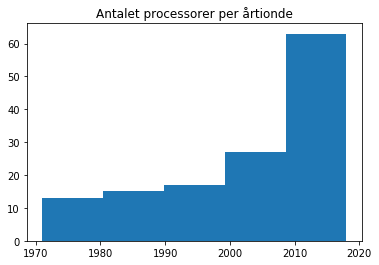

In [131]:
#Vosa processorer per åtionde
counts, bins = np.histogram(years, bins=5, range=(1970, 2020))
plt.hist(years, bins=5)
plt.title("Antalet processorer per årtionde")
plt.show()

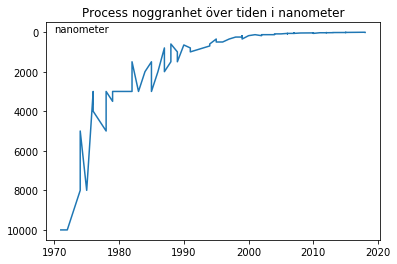

In [132]:
#Noggrannheten av process över tid
ylim=(0,10000)
plt.title('Process noggranhet över tiden i nanometer')
plt.gca().invert_yaxis()
plt.annotate('nanometer', (1970,10))
plt.plot(df['Year'].values, df['Process'].values)
plt.show()

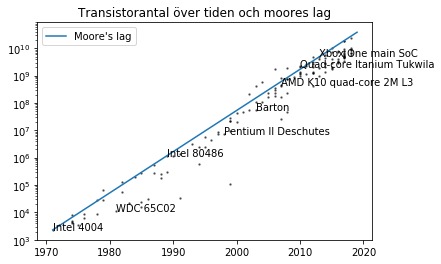

In [133]:
#Transistorantalet över tiden jämfört mot moores lag(transistor antalet fördubblas varannat år)
colors = (0,0,0)
area = 2
moores = []
starttransistors = 2300
mooresyears = []
startyear = 1971
x=0
for i in range(25):
    moores.append(starttransistors)
    starttransistors = starttransistors*2
for i in range(25):
    mooresyears.append(startyear)
    startyear = startyear+2

plt.scatter(df['Year'].values, df['Transistors'].values, s=area, c=colors, alpha=0.5)
plt.plot(mooresyears, moores, label="Moore's lag")
plt.yscale('log')
plt.title('Transistorantal över tiden och moores lag')
for i in range(8):
    plt.annotate(df['Processor'].values[x], (df['Year'].values[x], df['Transistors'].values[x]))
    x=x+13
plt.legend()
plt.show()